<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 

response = request.urlopen(url2)
raw = response.read().decode('utf8')
len(raw)

# La longueur est de 1'034'478


1034478

Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup

In [4]:
html2 = request.urlopen(url2).read().decode('utf8')
raw2 = BeautifulSoup(html2, 'html.parser').get_text()

with open("raw2.txt", "w", encoding="utf-8") as file:
    file.write(raw2)
    
print(len(raw2))

167148


**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [5]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
start = raw2.find("Swiss Confederation\nFive official names")
end = raw2.find("Switzerland portalEurope portal")
raw2crop = raw2[start:end]

print(len(raw2crop))
print("First 100 char : \n %s \n" %raw2crop[0:100])
print("Last 100 char : \n %s" %raw2crop[len(raw2crop)-100:len(raw2crop)])



92574
First 100 char : 
 Swiss Confederation
Five official names

Schweizerische Eidgenossenschaft (German)Confédération suis 

Last 100 char : 
 dant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.[281][282]

See also




**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [6]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
raw2cropclean = raw2crop.replace("\n", " ") #Petit nettoyage des \n avant la tokenisation
sentences = nltk.sent_tokenize(raw2cropclean)
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    fd.write(" ".join(tokens) + "\n")
fd.close()


In [7]:
# Votre appréciation de la qualité ici :
# Ici je trouve que la qualité est bof, on a des espaces avant les points et on garde les références, ex : [1] 

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [8]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
words2 = nltk.word_tokenize(raw2cropclean)
len(words2)

17572

**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [9]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
tokens2 = nltk.Text(words2)
vocab = set(tokens2)
print("Nombre de mots différents dans le vocabulaire: %d" %len(vocab))

longest_words = sorted(vocab, key=len, reverse=True)[:20]
print("Les 20 types les plus longs sont:")
for word in longest_words:
    print(word)

Nombre de mots différents dans le vocabulaire: 4264
Les 20 types les plus longs sont:
languagesGermanFrenchItalianRomanshReligion
Svizzer/SvizraGovernmentFederal
Schweizer/SchweizerinFrench
elvetico/elveticaRomansh
Suisse/SuissesseItalian
Donau-Iller-Rhine-Limes
65,000-kilometre-long
policies—contributes
Switzerland–European
assembly-independent
machines/electronics
Baume-SchneiderBeat
instruments/watches
non-German-speaking
57.1-kilometre-long
commander-in-chief
autobahn/autoroute
multi-disciplinary
cityZurichOfficial
LegislatureFederal


In [15]:
# Votre réponse à la question ici :
# On voit ici que comme dans le labo1b, on obtient des mots composés mais en plus de ça on obtient aussi des artéfacts de la page web comme "languagesGermanFrenchItalianRomanshReligion"

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [19]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
lowercaseTokens2 = [token.lower() for token in tokens2 if token.isalpha()]
freq_dist2 = nltk.FreqDist(lowercaseTokens2)

mostCommon2 = freq_dist2.most_common(30)

mostCommon2


[('the', 1152),
 ('of', 560),
 ('in', 464),
 ('and', 459),
 ('to', 232),
 ('switzerland', 225),
 ('swiss', 185),
 ('a', 178),
 ('is', 151),
 ('as', 102),
 ('federal', 98),
 ('by', 92),
 ('for', 89),
 ('are', 87),
 ('was', 85),
 ('with', 78),
 ('from', 70),
 ('it', 61),
 ('world', 52),
 ('at', 49),
 ('has', 47),
 ('on', 46),
 ('most', 44),
 ('its', 44),
 ('one', 41),
 ('an', 41),
 ('other', 39),
 ('population', 39),
 ('cantons', 38),
 ('main', 38)]

**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

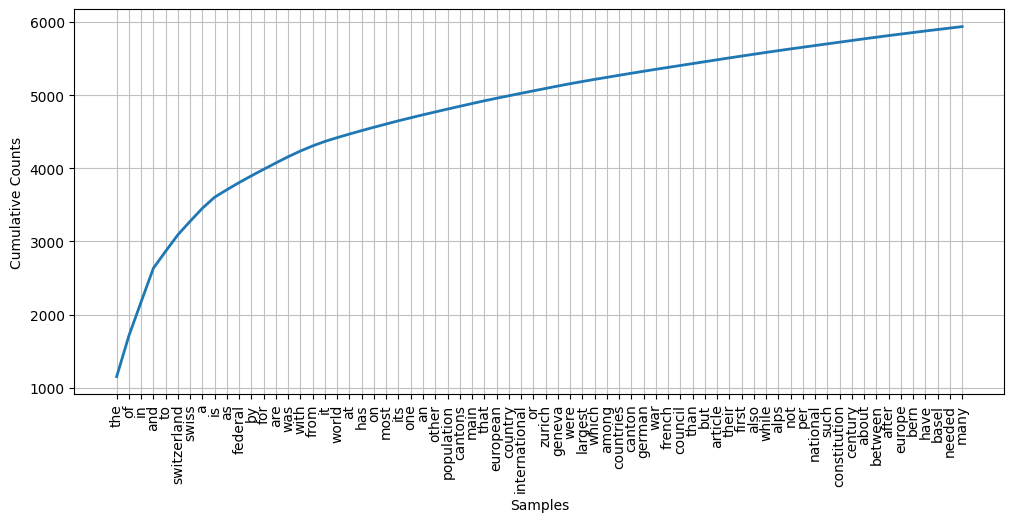

In [21]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5))
freq_dist2.plot(70, cumulative=True)

**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

Text(0, 0.5, 'Frequency')

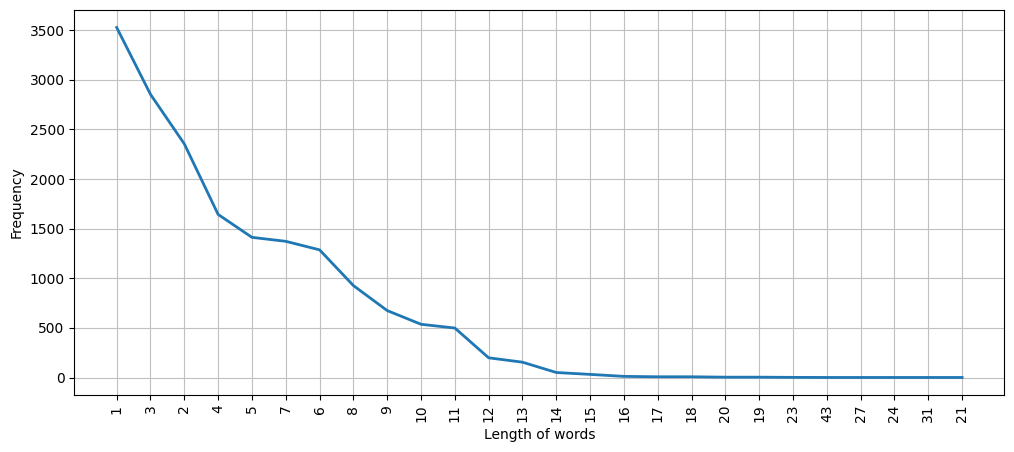

In [23]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
lenList2 = list(map(len, tokens2))
len_freq2 = nltk.FreqDist(lenList2)
plt.figure(figsize=(12, 5))
plot = len_freq2.plot(cumulative=False)
plot.set_xlabel("Length of words")
plot.set_ylabel("Frequency")


In [ ]:
# Votre réponse à la question ici :
# jsp

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 